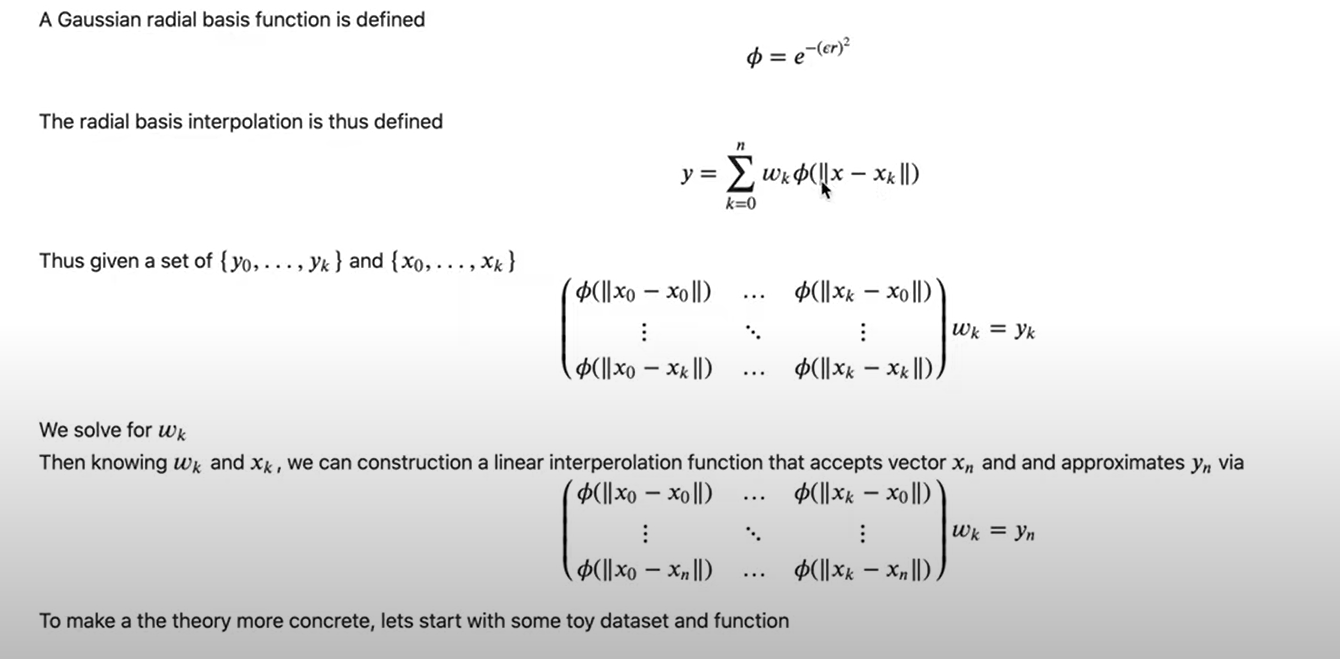

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
xk_inp = np.linspace(-2,1.5,5)
x_inp = np.linspace(-2,1.5,100)
# yk = np.linspace(-2,2,5)
# y = np.linspace(-2,2,100)


xk = np.hstack((xk_inp,xk_inp*-1))
x = np.hstack((x_inp,x_inp*-1))


def true_fn(x):
    return np.hstack((np.sqrt((2**2 - x**2)),-np.sqrt((2**2 - x**2))))
# def true_fn(x):
#   return x

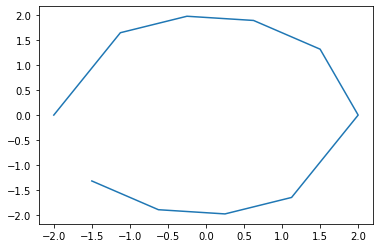

In [ ]:
yk = true_fn(xk_inp)

y = true_fn(x_inp)

yk.size

zk = np.ones((10,1))*2 

z = np.ones((200,1))*2

plt.plot(xk,yk)

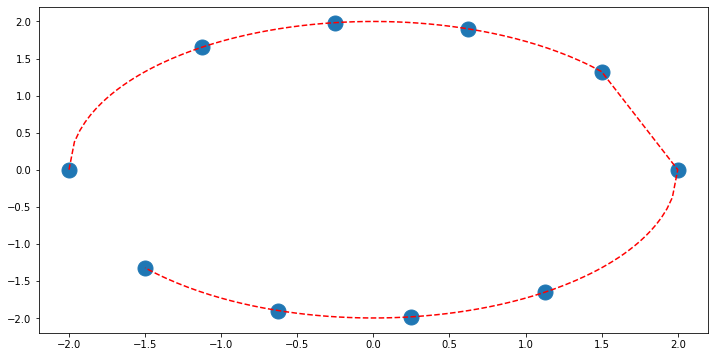

In [ ]:
# zk = np.hstack((xk,xk[::-1]))

plt.figure(figsize=(12,6))
plt.plot(xk, yk, 'o', markersize=15)
plt.plot(x, y, '--r')

In [ ]:
def eucl_dist_1d_sqr(x, xk):
  return (x.reshape(-1,1) - xk.reshape(1,-1))**2

In [ ]:
def eucl_dist_2d(x, xk, y, yk):
  return np.sqrt(eucl_dist_1d_sqr(x, xk) + (eucl_dist_1d_sqr(y, yk)))

In [ ]:

np.linalg.det(eucl_dist_2d(xk, xk, yk, yk))


-1331.0508566219319

In [ ]:
def gauss_rbf(radius, epsilon):
  return np. exp(-(radius*epsilon)**2)

In [ ]:
yk

array([ 0.        ,  1.65359457,  1.98431348,  1.89983552,  1.32287566,
       -0.        , -1.65359457, -1.98431348, -1.89983552, -1.32287566])

In [ ]:
np.linalg.det(gauss_rbf(eucl_dist_2d(xk, xk, yk, yk), 1))

0.283369403091628

In [ ]:

class RBF(object):
  def __init__(self, eps) -> None:
      self.eps = eps

  def fit(self, xk, yk, zk) -> None:
      self.xk_ = xk
      self.yk_ = yk
      trnsf = gauss_rbf(eucl_dist_2d(xk, xk, yk, yk), self.eps)
      self.w_ = np.linalg.solve(trnsf, zk)

  def __call__(self, xn, y_est):
      trnsf = gauss_rbf(eucl_dist_2d(self.xk_, xn, self.yk_, y_est), self.eps)
      return trnsf.dot(self.w_)

In [ ]:
ob = RBF(2)


In [ ]:
ob.fit(xk, yk, zk)
ob.w_

array([[1.99933552],
       [1.94396513],
       [1.85532988],
       [1.89125494],
       [1.97596916],
       [1.99933552],
       [1.94396513],
       [1.85532988],
       [1.89125494],
       [1.97596916]])

In [ ]:
ob(x)

array([-1.        , -1.00779115, -1.01468846, -1.02066467, -1.02569438,
       -1.02975402, -1.03282205, -1.03487898, -1.03590745, -1.0358923 ,
       -1.03482063, -1.03268182, -1.02946759, -1.02517201, -1.0197915 ,
       -1.01332485, -1.00577321, -0.99714004, -0.98743112, -0.97665448,
       -0.96482038, -0.95194119, -0.93803141, -0.9231075 , -0.90718786,
       -0.89029271, -0.87244399, -0.85366526, -0.83398159, -0.81341946,
       -0.7920066 , -0.76977191, -0.74674534, -0.72295773, -0.69844074,
       -0.67322669, -0.64734844, -0.62083931, -0.59373295, -0.56606322,
       -0.5378641 , -0.5091696 , -0.48001366, -0.45043009, -0.42045245,
       -0.39011403, -0.35944778, -0.32848623, -0.2972615 , -0.26580522,
       -0.23414853, -0.20232204, -0.17035587, -0.1382796 , -0.1061223 ,
       -0.07391254, -0.0416784 , -0.00944751,  0.0227529 ,  0.05489603,
        0.0869554 ,  0.11890484,  0.15071845,  0.18237055,  0.21383563,
        0.24508831,  0.27610328,  0.3068553 ,  0.33731911,  0.36

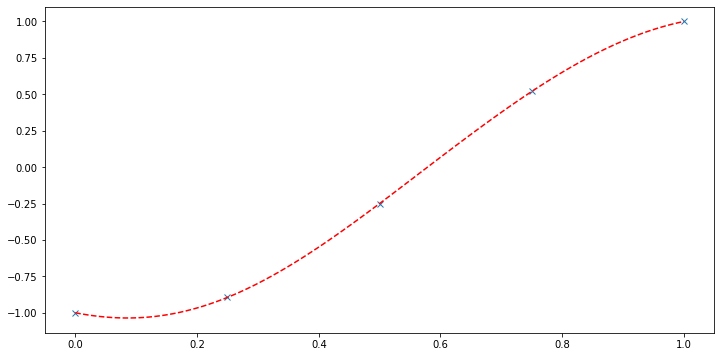

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(xk, yk, 'x')
plt.plot(x, ob(x), '--r')

Code for N -dimension RBF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def eucl_dist_1d(x, xk):
  return np.sqrt((x.reshape(-1,1) - xk.reshape(1,-1))**2)

In [3]:

class RBF(object):
  def __init__(self, eps) -> None:
      self.eps = eps

  def fit(self, x, y) -> None:
      self.xk_ = x
      self.yk_ = y
      trnsf = gauss_rbf(eucl_dist_2d(x, x), self.eps)
      self.w_ = np.linalg.solve(trnsf, y)
  
  def gauss_rbf(self, radius):
    return np. exp(-(radius*self.epsilon)**2)

  def __call__(self, x):
      trnsf = self.gauss_rbf(eucl_dist_1d(x, self.xk_))
      return trnsf.dot(self.w_)

Assuming error == 0 for the points on the circle

In [5]:
def func(x1, x2):
  return x1**2 + x2**2 - 4

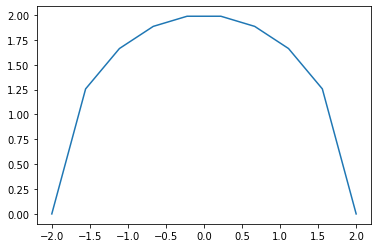

In [6]:
# def gen_data():
x1 = np.linspace(-2,2,10)
x2 = np.sqrt(4 - x1**2)
plt.plot(x1,x2)
xx, xy = np.meshgrid(x1, x2)
#  print(xy)
#  print(x2)
y = func(x1, x2)
  # return np.concatenate([xx.reshape(-1,1), xy.reshape(-1,1)], axis=1), y.reshape(-1,1)

In [7]:
y

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00, -4.4408921e-16,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00])

In [8]:
# data, y_t = gen_data()

In [9]:
def eucl_dist_1d_sqr(x, xk):
  return (x.reshape(-1,1) - xk.reshape(1,-1))**2

def eucl_dist_2d(x, xk, y, yk):
  return np.sqrt(eucl_dist_1d_sqr(x, xk) + (eucl_dist_1d_sqr(y, yk)))

AW = 0

In [11]:
def gauss_rbf(radius, epsilon):
  return np. exp(-(radius*epsilon)**2)

In [12]:
eps = 20
trans = gauss_rbf(eucl_dist_2d(x1,x1,x2,x2), eps) 

In [14]:
u,s,vt = np.linalg.svd(trans)

In [20]:
s

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
w_ = vt[-1,:]
x = np.linspace(-2,0,100)
# y = np.sqrt(4 - x**2)

In [16]:
w_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

x1 --x
x2 --y

In [18]:
new_trnsf = gauss_rbf(eucl_dist_2d(x, x1,y, x2), eps)
z_ = new_trnsf.dot(w_)

In [19]:
z_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

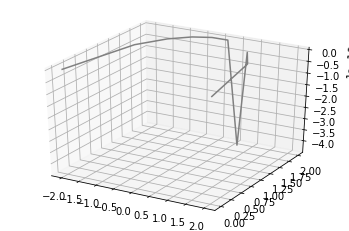

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x1, x2, y, 'gray')

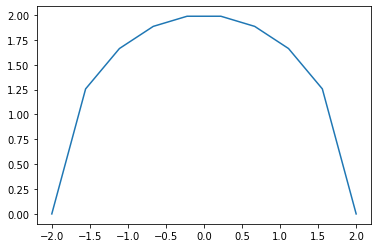

In [ ]:
plt.plot(x1,x2)

(0.0, 100.0)

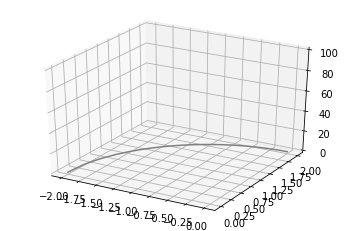

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot3D(x1, x2, y, 'gray')
ax.plot3D(x, x_, z_, 'gray')
ax.set_zlim(0, 100)